# Adversarial Search: Playing Connect 4

Student Name: [Add your name]

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

In [1]:
# Your code/answer goes here.

How big is the state space? Give an estimate and explain it.

In [2]:
# Your code/ answer goes here.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [3]:
# Your code/ answer goes here.

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [4]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

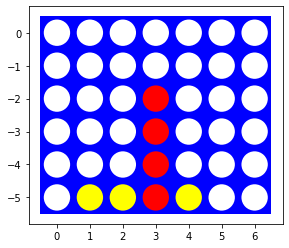

In [5]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()
    
board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

**REFERENCE:** I referenced the following websites to be able to implement the helper functions.
* https://medium.com/analytics-vidhya/artificial-intelligence-at-play-connect-four-minimax-algorithm-explained-3b5fc32e4a4f
* https://github.com/KeithGalli/Connect4-Python/blob/master/connect4_with_ai.py
* https://connect4.readthedocs.io/_/downloads/en/latest/pdf/
* https://stackoverflow.com/questions/29949169/python-connect-4-check-win-function

In [6]:
def is_possible(board, column):
    return board[row][column] == 0

In [7]:
# Returns all available actions
def actions(board): # Equivalent to get valid locations
    available_actions = []
    row_count = board.shape[0]
    column_count = board.shape[1]
    for col in range(column_count):
        available_actions.append(col)
    return available_actions
    

In [8]:
# Testing actions fucntion on an empty board
board = empty_board(shape =(6,7))
actions(board)

[0, 1, 2, 3, 4, 5, 6]

In [97]:
# Returns the new state of the board. Available actions already checks whether the move is possible, so 
# there is no need to check for illegal moves here.
def result(state, piece, action = -1): # State = the current board. Piece = Player.
    """Add move to the board."""
        
    # making a deep copy is very important so you do not overwrite other 
    # states in your search tree. 
    state = state.copy()
    row_count = state.shape[0]
    column_count = state.shape[1]
    
    # Note: x.copy() makes a deep copy of a Python list. For a numpy array/matrix you 
    #       need to use numpy.copy() instread!
    if action != -1:
        for row in range(row_count-1, 0, -1):
            if state[row][action] == 0:
                state[row][action] = piece
                break
    return state

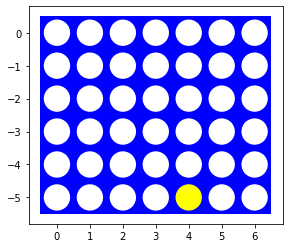


New state after placing a yellow piece in the third column:


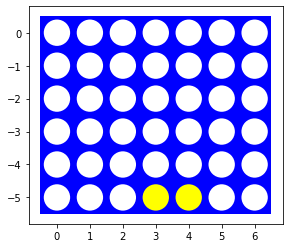


New state after placing another yellow piece in the same column:


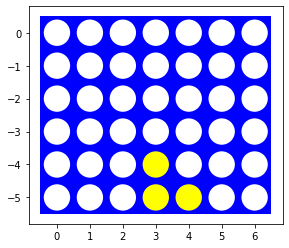

In [98]:
visualize(board)

print()
print("New state after placing a yellow piece in the third column:")
visualize(result(board, -1, 3))
board = result(board, -1, 3)

print()
print("New state after placing another yellow piece in the same column:")
visualize(result(board, -1, 3))

In [99]:
# Function checks the board to see if the player won or if it's time
# make the next move or if there is a draw. Uses a brute force approach to check for wins. 
def check_board(board, piece): # The player is the piece in this definition
    column_cnt = board.shape[1]
    row_cnt = board.shape[0]
    
    # Check horizontal locations for win
    for c in range(column_cnt-3):
        for r in range(row_cnt):
            if board[r][c] == piece and board[r][c+1] == piece and board[r][c+2] == piece and board[r][c+3] == piece:
                return piece

    # Check vertical locations for win
    for c in range(column_cnt):
        for r in range(row_cnt-3):
            if board[r][c] == piece and board[r+1][c] == piece and board[r+2][c] == piece and board[r+3][c] == piece:
                return piece

    # Check positively sloped diagonals
    for c in range(column_cnt-3):
        for r in range(row_cnt-3):
            if board[r][c] == piece and board[r+1][c+1] == piece and board[r+2][c+2] == piece and board[r+3][c+3] == piece:
                return piece

    # Check negatively sloped diagonals
    for c in range(column_cnt-3):
        for r in range(3, row_cnt):
            if board[r][c] == piece and board[r-1][c+1] == piece and board[r-2][c+2] == piece and board[r-3][c+3] == piece:
                return piece
    
    # Checking to see if there are no other available actions. If so, it's a draw
    if(np.sum(board == 0) < 1):
        return 'd'
    
    # Returning n indicates that it's time to return the next move (no wins)
    return 'n'

In [100]:
# Determines if there is a terminal state
def is_terminal(board): # Equivalent to is_terminal
    return check_board(board, 1) != 'n' or check_board(board, -1) != 'n' # Check for player 1 and player 2

In [102]:
# I referenced the class notebook for the utility function.
def utility(board):
    player_1 = 1 # Red Player
    player_2 = -1 # Yellow Player
    
    # If infinity is returned, player 1 wins
    if check_board(board, player_1) == player_1:
        return 1000000000
    # If negative infinity is returned, player 2 wins
    elif check_board(board, player_2) == player_2:
        return -1000000000
    
    # If there is a draw, the utility is 0 since no one wins
    elif check_board(board, player_2) == 'd' or check_board(board, player_1) == 'd':
        return 0
    return None

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [103]:
def random_player(board, player):
    return np.random.choice(actions(board))

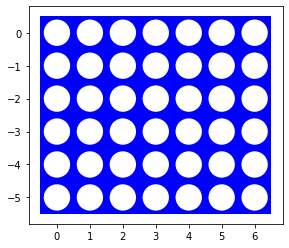

CPU times: user 176 µs, sys: 450 µs, total: 626 µs
Wall time: 2.42 ms


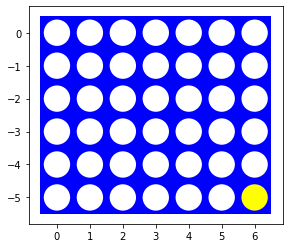

-3


In [104]:
board = empty_board()
visualize(board)

%time random_player(board, player = -1)
board = result(board, -1, random_player(board, player = -1))
visualize(board)
print(utility(board))

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

# NEED TO ADD DESCRIPTION - referenced functions from class jupyter notebook.

In [105]:
def switch_player(player, player_1, player_2):
    if player == 1:
        return -1, player_2
    else:
        return 1, player_1
    

In [106]:
def play_random(player_1, player_2, N = 100, verbose = False):
    """Let two agents play each other N times. x starts. x and y are agent functions that 
    get the board as the percept and return their next action."""
    results = {1: 0, -1: 0, 'd': 0}
    
    for i in range(N):
        board = empty_board()
        player, fun = 1, player_1 # Assign 1 to first player
        
        while True:
            a = fun(board, player)
            board = result(board, player, a)
            win = check_board(board, player)   # returns the 'n' if the game is not done.
            if win != 'n':
                results[win] += 1
                if verbose: visualize(board)
                if verbose: print(utility(board))
                break
            
            player, fun = switch_player(player, player_1, player_2)   
    
    return results

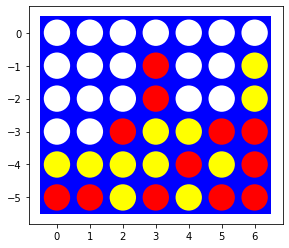

-1000000000


{1: 0, -1: 1, 'd': 0}

In [107]:
play_random(random_player, random_player, N = 1, verbose = True)

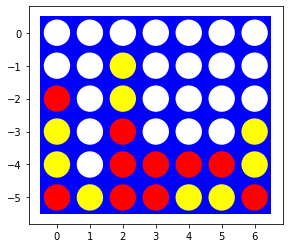

1000000000


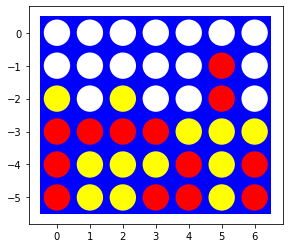

1000000000


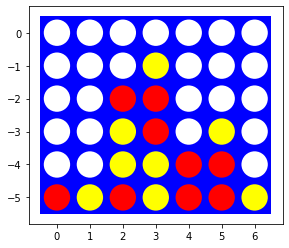

1000000000


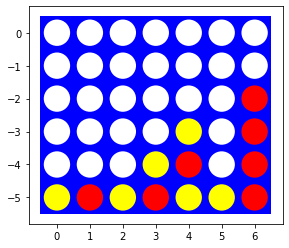

1000000000


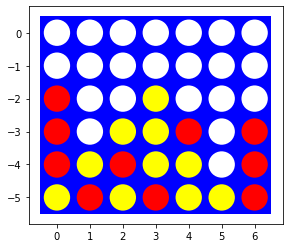

-1000000000


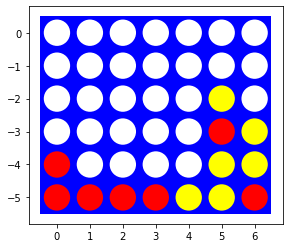

1000000000


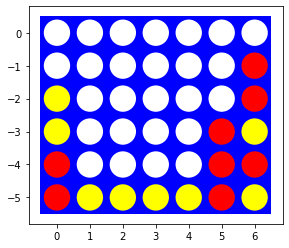

-1000000000


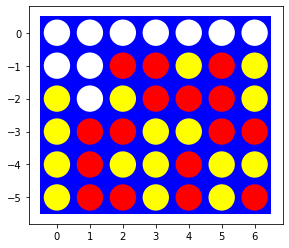

-1000000000


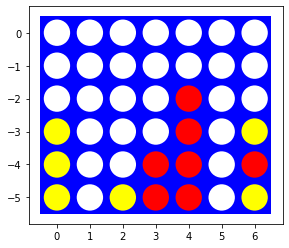

1000000000


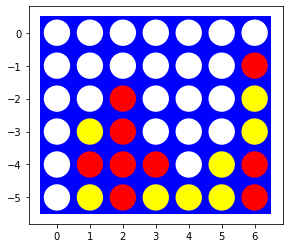

1000000000


KeyboardInterrupt: 

In [59]:
play_random(random_player, random_player, N = 1000, verbose = True)

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points] 

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__ 
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

For my Minimax Search with Alpha-Beta Pruning implementation, I referenced the following sources as well as the pseudocode:
* https://medium.com/analytics-vidhya/artificial-intelligence-at-play-connect-four-minimax-algorithm-explained-3b5fc32e4a4f

<br> 
<div>
    <center><h3>Minimax Search with Alpha-Beta Pruning Pseudocode</h3></center>
    <br>
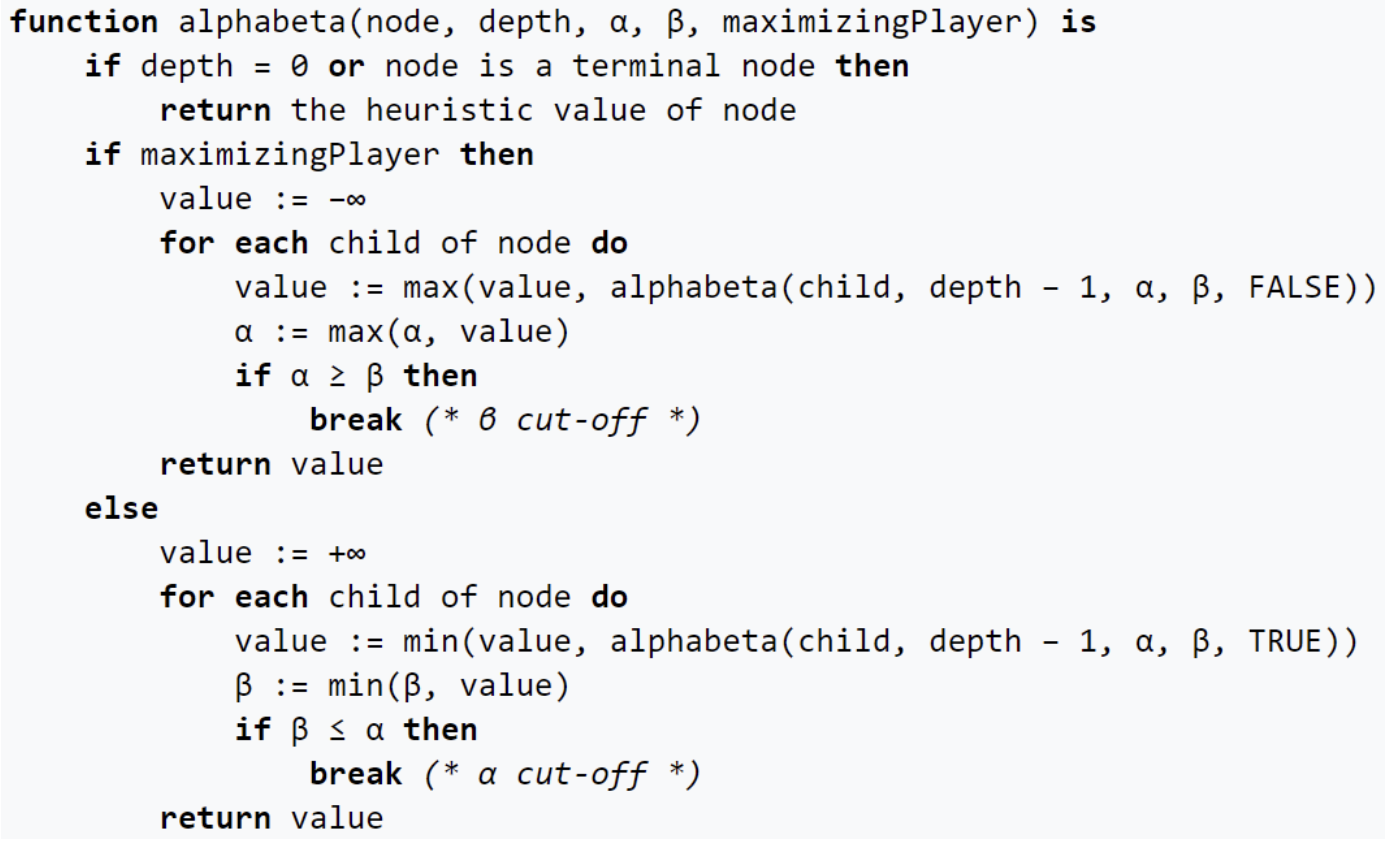
</div>

In [108]:
# Your code/ answer goes here.
def alphabeta(board, depth, alpha, beta, maximizingPlayer, verbose = False):
    results = {1: 0, -1: 0, 'd': 0}
    player_1 = 1
    player_2 = -1
    
    if depth == 0 or is_terminal(board):
        if verbose: visualize(board)
        if is_terminal(board):
            if check_board(board, player_1) == 1:
                results[player_1] += 1
            return utility(board)
        
        else: # Depth is 0 aka there is a draw/no more moves
            results['d'] += 1
            return utility(board)
    
    if maximizingPlayer:
        value = -1000000000
        for poss_cols in actions(board):
            value = max(value, alphabeta(board, depth-1, alpha, beta, False))
            alpha = max(alpha, value)

            if alpha >= beta:
                break
        return value
    
    else:
        value = 1000000000
        for poss_cols in actions(board):
            value = min(value, alphabeta(board, depth-1, alpha, beta, True))
            beta = min(beta, value)
            if beta <= alpha:
                break
        return 
        

In [126]:
def other(player): 
    if player == 1: return -1
    else: return 1

In [130]:
import math

In [142]:
# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def alpha_beta_search(board, player = 1):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    
    value, move = max_value_ab(board, player, -math.inf, +math.inf)
    
    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 
    
    return { "move": move, "value": value }

def max_value_ab(state, player, alpha, beta):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
       
    # return utility of state is a terminal state
    v = utility(state)
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not (-1000000000 or 1000000000):
        if DEBUG >= 2: print(f"     found terminal state. backtracking.")
        return v, None
        
    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in actions(state):
        v2, a2 = min_value_ab(result(state, player, a), player, alpha, beta)
        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    return v, move

def min_value_ab(state, player, alpha, beta):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state is a terminal state
    v = utility(state)
    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not (-1000000000 or 1000000000):
        if DEBUG >= 2: print(f"     found terminal state. backtacking.")
        return v, None
    
    v, move = +math.inf, None

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in actions(state):
        v2, a2 = max_value_ab(result(state, other(player), a), player, alpha, beta)
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: 
            if DEBUG >= 2: print(f"     v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    return v, move

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

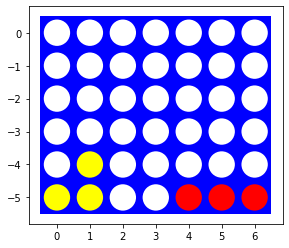

Traditional 6x7 Board:  1

Number of nodes searched: 1


{'move': None, 'value': 1}

CPU times: user 928 µs, sys: 194 µs, total: 1.12 ms
Wall time: 1.09 ms


In [143]:
# Your code/ answer goes here.
board_1 = empty_board()
board_1[5][0] = -1 
board_1[5][1] = -1
board_1[4][1] = -1

board_1[5][6] = 1
board_1[5][5] = 1
board_1[5][4] = 1

visualize(board_1)
print("Traditional 6x7 Board: ", alphabeta(board_1, 5, 1, -1, True, verbose = True))
print()
%time display(alpha_beta_search(board_1))

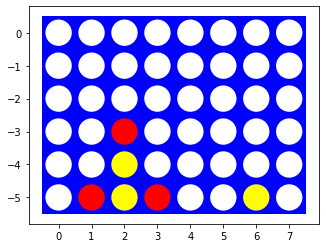

6x5 Board:  4


In [110]:
board_2 = empty_board(shape = [6, 8])
board_2 = result(board_2, -1, random_player(board_2, player = -1))
board_2 = result(board_2, -1, random_player(board_2, player = -1))
board_2 = result(board_2, -1, random_player(board_2, player = -1))

board_2 = result(board_2, 1, random_player(board_2, player = 1))
board_2 = result(board_2, 1, random_player(board_2, player = 1))
board_2 = result(board_2, 1, random_player(board_2, player = 1))

visualize(board_2)
print("6x5 Board: ", alphabeta(board_2, 5, 1, -1, True, verbose = True))

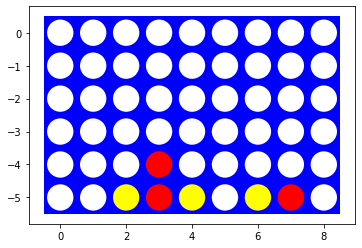

8x7 Board:  0


In [111]:
board_3 = empty_board(shape = [6, 9])
board_3 = result(board_3, -1, random_player(board_3, player = -1))
board_3 = result(board_3, -1, random_player(board_3, player = -1))
board_3 = result(board_3, -1, random_player(board_3, player = -1))

board_3 = result(board_3, 1, random_player(board_3, player = 1))
board_3 = result(board_3, 1, random_player(board_3, player = 1))
board_3 = result(board_3, 1, random_player(board_3, player = 1))

visualize(board_3)
print("8x7 Board: ", alphabeta(board_4, 7, 1, -1, True, verbose = True))

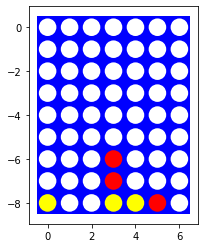

9x7 Board:  16


In [116]:
board_4 = empty_board(shape = [9, 7])
board_4 = result(board_4, -1, random_player(board_4, player = -1))
board_4 = result(board_4, -1, random_player(board_4, player = -1))
board_4 = result(board_4, -1, random_player(board_4, player = -1))

board_4 = result(board_4, 1, random_player(board_4, player = 1))
board_4 = result(board_4, 1, random_player(board_4, player = 1))
board_4 = result(board_4, 1, random_player(board_4, player = 1))

visualize(board_4)
print("9x7 Board: ", alphabeta(board_4, 8, 1, -1, True, verbose = True))

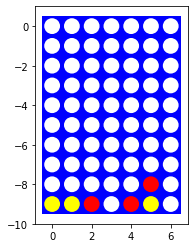

10x7 Board:  4


In [118]:
board_5 = empty_board(shape = [10, 7])
board_5 = result(board_5, -1, random_player(board_5, player = -1))
board_5 = result(board_5, -1, random_player(board_5, player = -1))
board_5 = result(board_5, -1, random_player(board_5, player = -1))

board_5 = result(board_5, 1, random_player(board_5, player = 1))
board_5 = result(board_5, 1, random_player(board_5, player = 1))
board_5 = result(board_5, 1, random_player(board_5, player = 1))

visualize(board_5)
print("10x7 Board: ", alphabeta(board_5, 9, 1, -1, True, verbose = True))

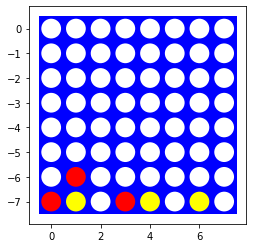

8x8 Board:  -1


In [119]:
board_6 = empty_board(shape = [8, 8])
board_6 = result(board_6, -1, random_player(board_6, player = -1))
board_6 = result(board_6, -1, random_player(board_6, player = -1))
board_6 = result(board_6, -1, random_player(board_6, player = -1))

board_6 = result(board_6, 1, random_player(board_6, player = 1))
board_6 = result(board_6, 1, random_player(board_6, player = 1))
board_6 = result(board_6, 1, random_player(board_6, player = 1))

visualize(board_6)
print("8x8 Board: ", alphabeta(board_6, 7, 1, -1, True, verbose = True))

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.



### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [ ]:
# Your code/ answer goes here.

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

In [ ]:
# Your code/ answer goes here.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
# Your code/ answer goes here.

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

<br> 
<div>
    <center><h3>Heuristic Evaluation Function Pseudocode</h3></center>
    <p> For the purpose of the evaluation function, I referenced the pseudocode from one of the links above as well as the implementation from one of those links from the helper functions as well and created a hybrid-implementation that works with this assignment.</p>
    <br>
    
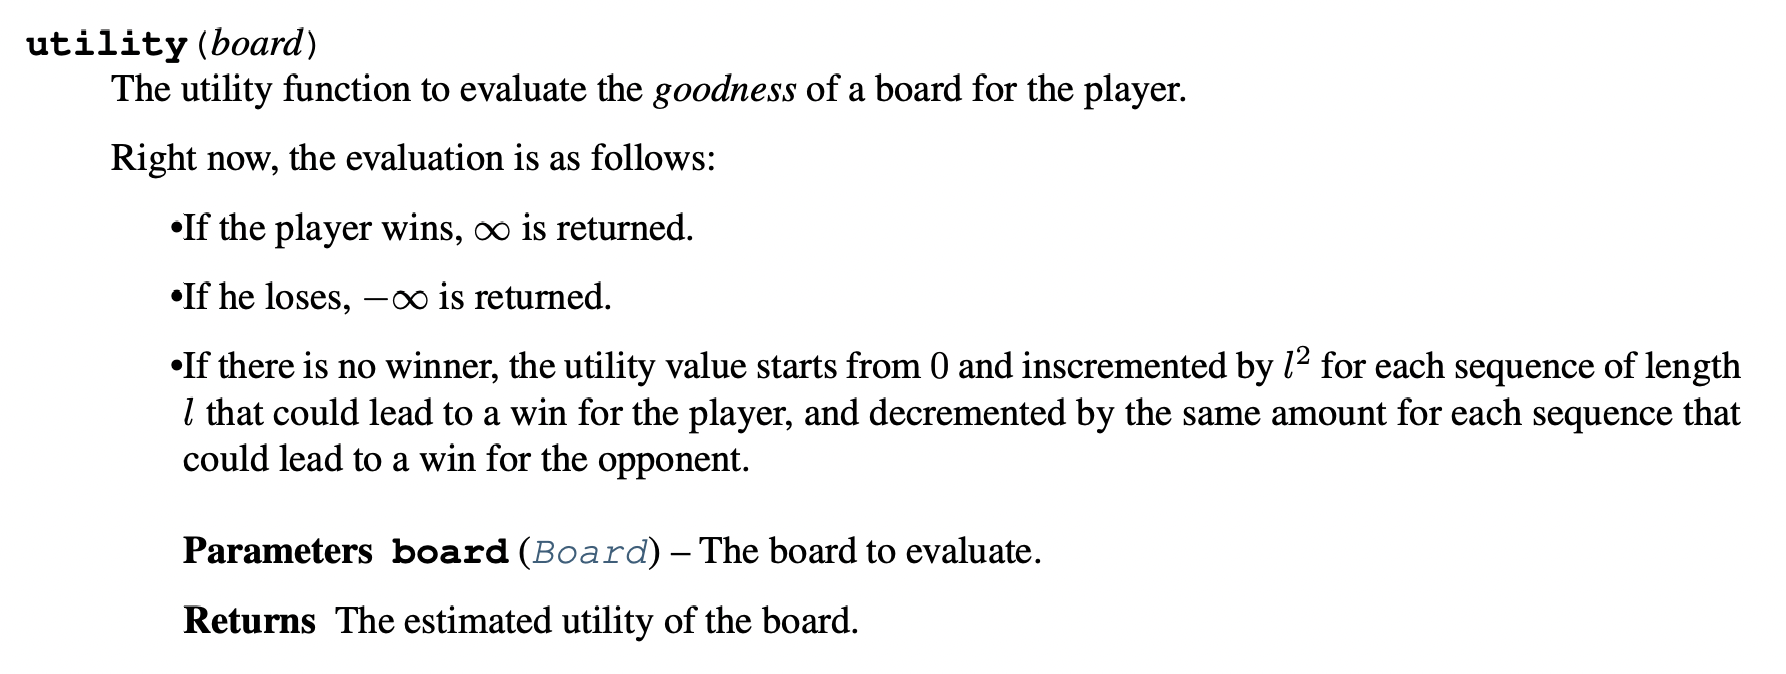
</div>

In [101]:
# This function evaluates the overall utility for the board and returns a score to be added (or subtracted)

def eval_score(window):
    player_1 = 1
    player_2 = -1
    score = 0
    
    # Evaluation for player 1
    if window.count(player_1) == 3 and window.count(0) == 1:
        score += 5
    elif window.count(player_1) == 2 and window.count(0) == 2:
        score += 2
    elif window.count(player_1) == 1 and window.count(0) == 3:
        score += 1
    
    # Evaluation for player 2
    if window.count(player_2) == 3 and window.count(0) == 1:
        score -= 5
    elif window.count(player_2) == 2 and window.count(0) == 2:
        score -= 2
    elif window.count(player_2) == 1 and window.count(0) == 3:
        score -= 1
    
    return score     

In [ ]:
def heuristic_eval(board):    
    utility = 0
    column_cnt = board.shape[1]
    row_cnt = board.shape[0]
    window_length = 4
    
    ## Score center column
    center_array = [int(i) for i in list(board[:, column_cnt//2])]
    center_count = center_array.count(player_1)
    utility += center_count * 3
    center_count = center_array.count(player_2)
    utility -= center_count * 3

    ## Score Horizontal
    for r in range(row_cnt):
        row_array = [int(i) for i in list(board[r,:])]
        for c in range(column_cnt-3):
            window = row_array[c:c+window_length]
            utility += eval_score(window)

    ## Score Vertical
    for c in range(column_cnt):
        col_array = [int(i) for i in list(board[:,c])]
        for r in range(row_cnt-3):
            window = col_array[r:r+window_length]
            utility += eval_score(window)

    ## Score posiive sloped diagonal
    for r in range(row_cnt-3):
        for c in range(column_cnt-3):
            window = [board[r+i][c+i] for i in range(window_length)]
            utility += eval_score(window)

    for r in range(row_cnt-3):
        for c in range(column_cnt-3):
            window = [board[r+3-i][c+i] for i in range(window_length)]
            utility += eval_score(window)

    return utility

### Cutting off search [10 points]

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [ ]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.